# Análisis y Modelación de Series de Tiempo
Utilizando los datos sobre los precios, el consumo y la importación de los diferentes tipos de gasolina a nivel nacional.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Lectura de Datos

In [29]:
def get_df(path: str) -> pd.DataFrame:
    temp = pd.read_csv(path)
    temp['Fecha'] = pd.to_datetime(temp['Fecha'])
    temp.set_index('Fecha', inplace=True)
    temp = temp.asfreq('MS')  # Frecuencia mensual
    return temp

In [30]:
df_consumo = get_df('data/consumo.csv')
df_consumo.head()

,Diesel,Propano,Regular,Super
Fecha,,,,
2000-01-01,0.0,194410.476190,202645.20,308156.82
2000-02-01,0.0,174710.552381,205530.96,307766.31
2000-03-01,0.0,189234.066667,229499.56,331910.29
2000-04-01,0.0,174330.607143,210680.40,315648.08
2000-05-01,0.0,191745.147619,208164.34,319667.97


En el documento de [análisis](analysis.ipynb) se puede encontrar que Diesel contiene datos no registrados, por lo que se eliminan.

In [46]:
df_consumo = df_consumo[df_consumo['Diesel'] > 0]

In [47]:
df_importacion = get_df('data/importacion.csv')
df_importacion.head()

,Diesel,Propano,Regular,Super
Fecha,,,,
2001-01-01,0.0,194065.738095,177776.50,373963.96
2001-02-01,0.0,170703.380952,123115.99,243091.07
2001-03-01,0.0,161837.371429,161726.42,312084.38
2001-04-01,0.0,163048.642857,127338.74,285054.89
2001-05-01,0.0,171518.861905,168730.19,300913.67


En el documento de [análisis](analysis.ipynb) se puede encontrar que Diesel contiene datos no registrados, por lo que se eliminan.

In [54]:
df_importacion = df_importacion[df_importacion['Diesel'] > 0]

In [48]:
df_precio = get_df('data/precios.csv')
df_precio.head()

,Super,Regular,Diesel
Fecha,,,
2002-01-01,12.55,12.19,8.95
2002-02-01,12.29,11.90,8.66
2002-03-01,12.58,12.17,8.69
2002-04-01,14.11,13.71,9.38
2002-05-01,14.16,13.79,9.44


## 2. Análisis de Series de Tiempo

### 2.a Inicio, Fin y Frecuencia

#### Consumo

In [44]:
print('Inicio:', df_consumo.index.min().strftime('%Y-%m'))
print('Fin:', df_consumo.index.max().strftime('%Y-%m'))
print('Frecuencia:', df_consumo.index.freq)

Inicio: 2000-01
Fin: 2024-05
Frecuencia: <MonthBegin>


#### Importación

In [45]:
print('Inicio:', df_importacion.index.min().strftime('%Y-%m'))
print('Fin:', df_importacion.index.max().strftime('%Y-%m'))
print('Frecuencia:', df_importacion.index.freq)

Inicio: 2001-01
Fin: 2024-05
Frecuencia: <MonthBegin>


#### Precio

In [35]:
print('Inicio:', df_precio.index.min().strftime('%Y-%m'))
print('Fin:', df_precio.index.max().strftime('%Y-%m'))
print('Frecuencia:', df_precio.index.freq)

Inicio: 2002-01
Fin: 2024-05
Frecuencia: <MonthBegin>


### 2.b Gráficos de Series
Los gráficos pueden encontrarse en archivo de [análisis](analysis.ipynb).

### 2.c Descompocisión de Series

In [36]:
def plot_decompose(df: pd.DataFrame, column: str):
    decomposition = seasonal_decompose(df[column], model='additive')
    fig, ax = plt.subplots(4, 1, figsize=(10, 8))
    ax[0].plot(decomposition.observed, label='Observed')
    ax[0].legend()
    ax[1].plot(decomposition.trend, label='Trend')
    ax[1].legend()
    ax[2].plot(decomposition.seasonal, label='Seasonal')
    ax[2].legend()
    ax[3].plot(decomposition.resid, label='Residual')
    ax[3].legend()
    plt.tight_layout()
    plt.show()

#### Consumo

##### Gasolina Diesel

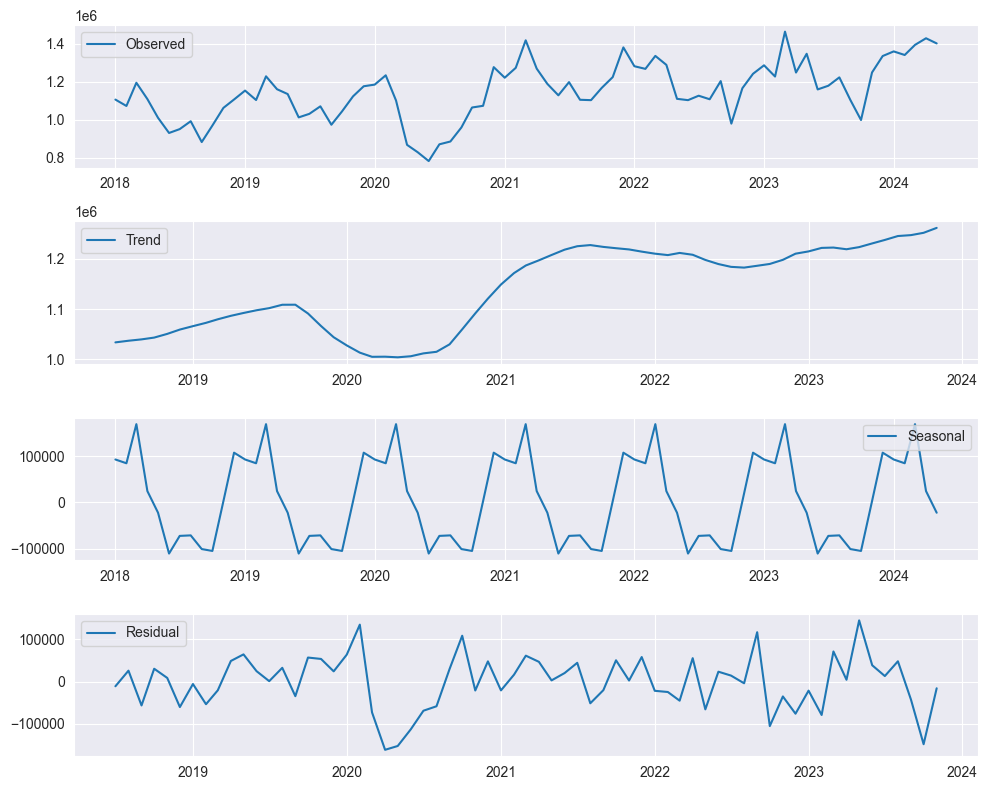

In [49]:
plot_decompose(df_consumo, 'Diesel')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Regular

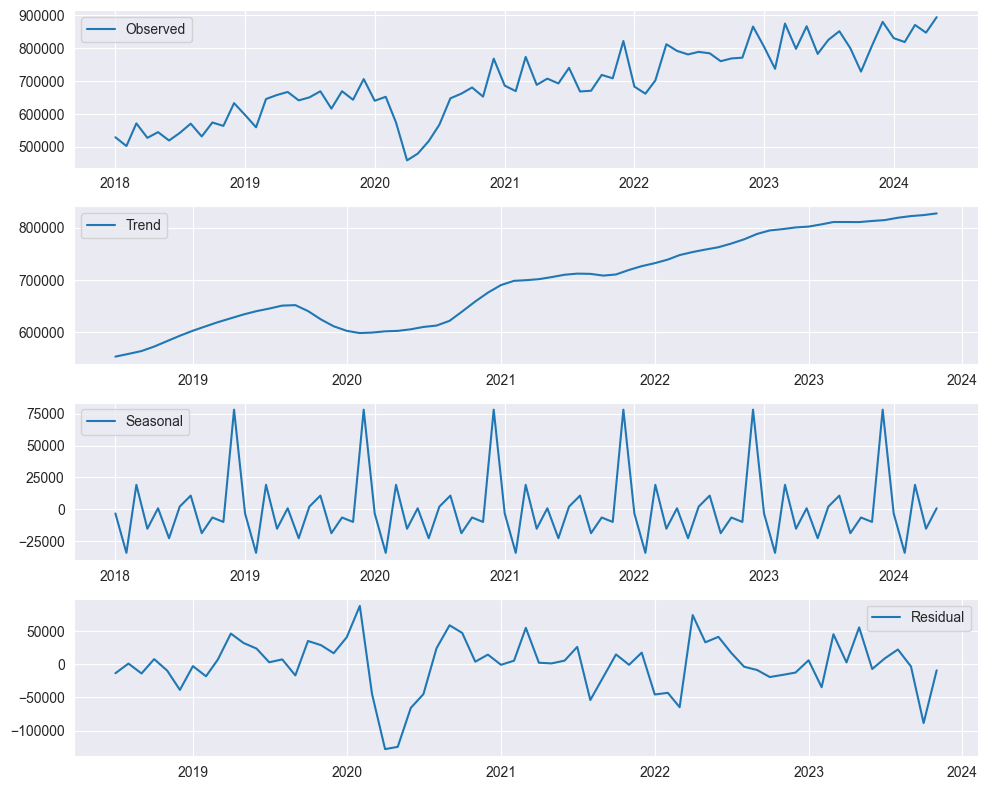

In [50]:
plot_decompose(df_consumo, 'Regular')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Super

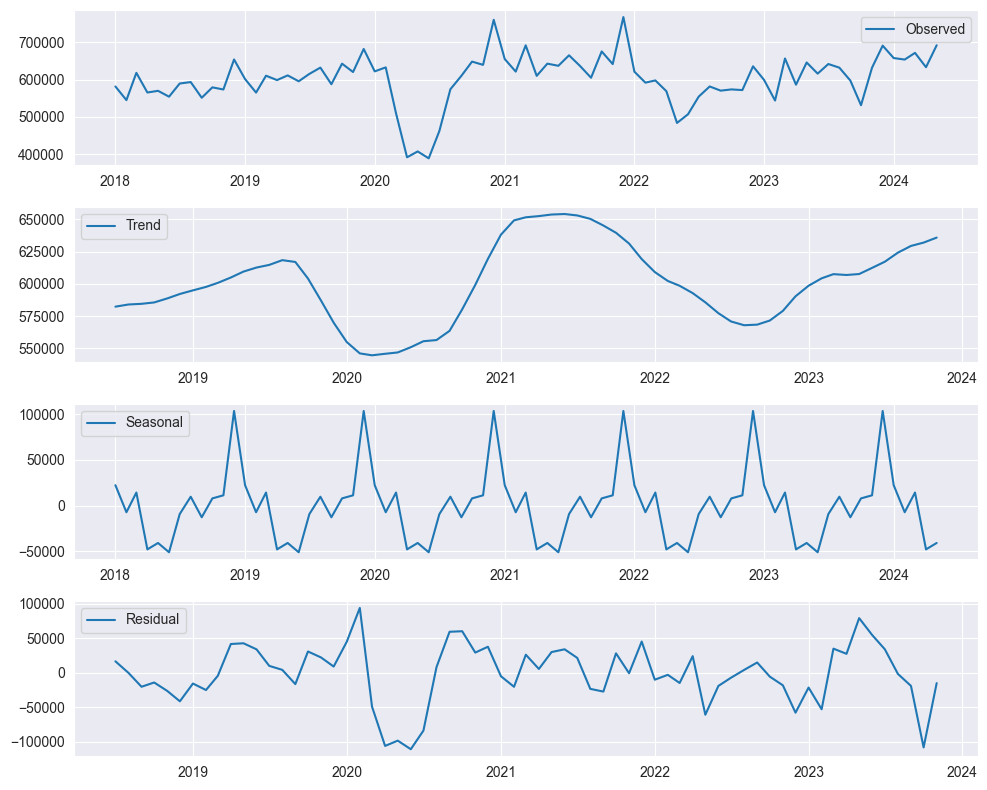

In [51]:
plot_decompose(df_consumo, 'Super')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gas Propano

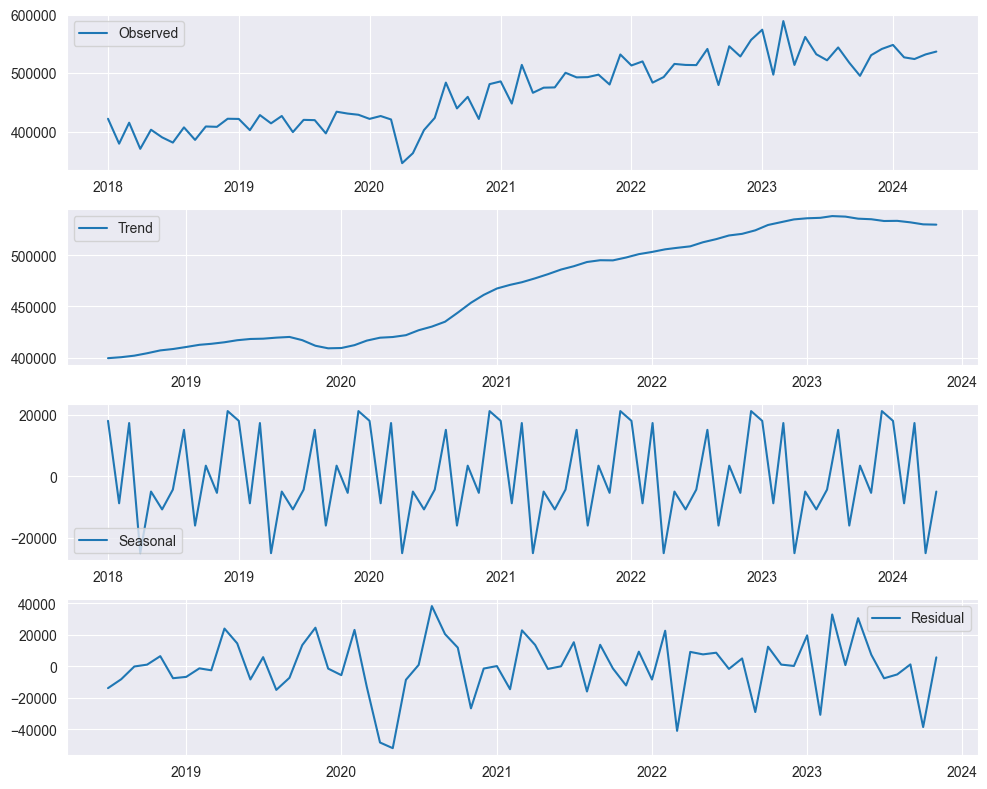

In [52]:
plot_decompose(df_consumo, 'Propano')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

#### Importación

##### Gasolina Diesel

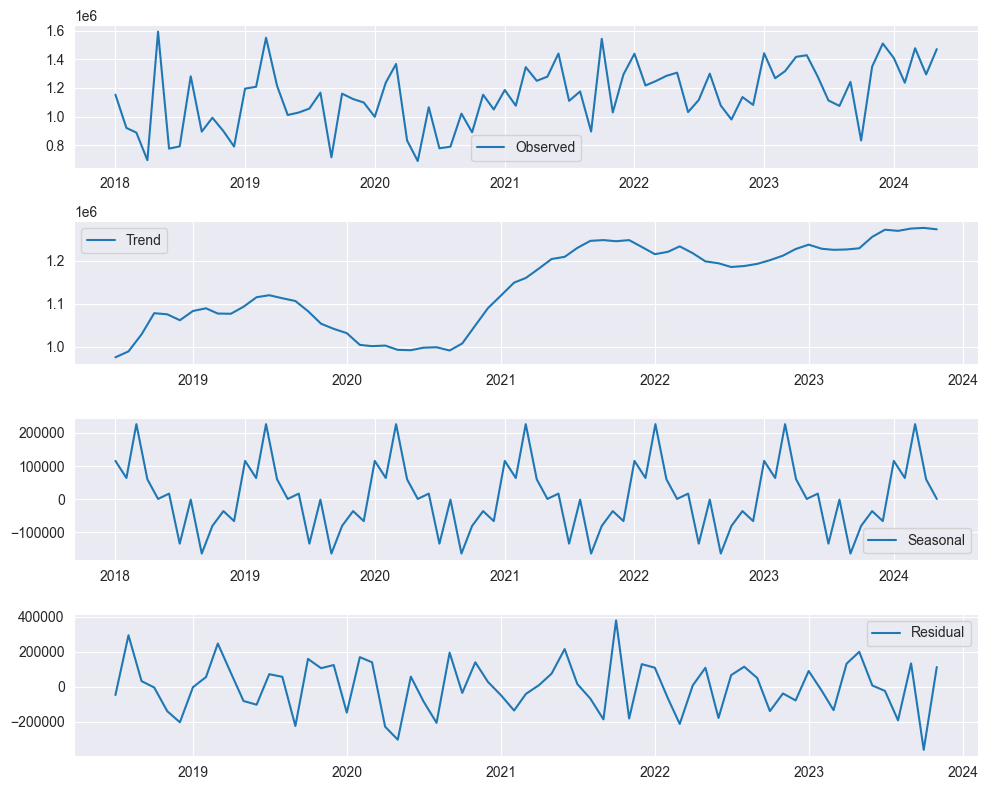

In [55]:
plot_decompose(df_importacion, 'Diesel')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Regular

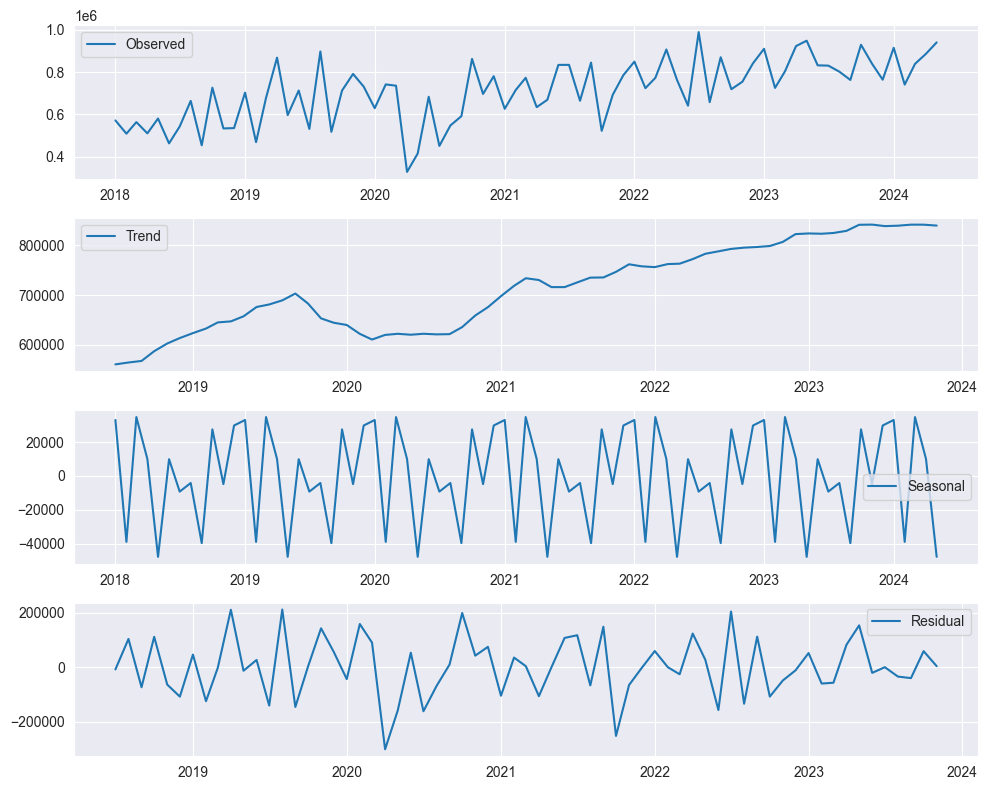

In [56]:
plot_decompose(df_importacion, 'Regular')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Super

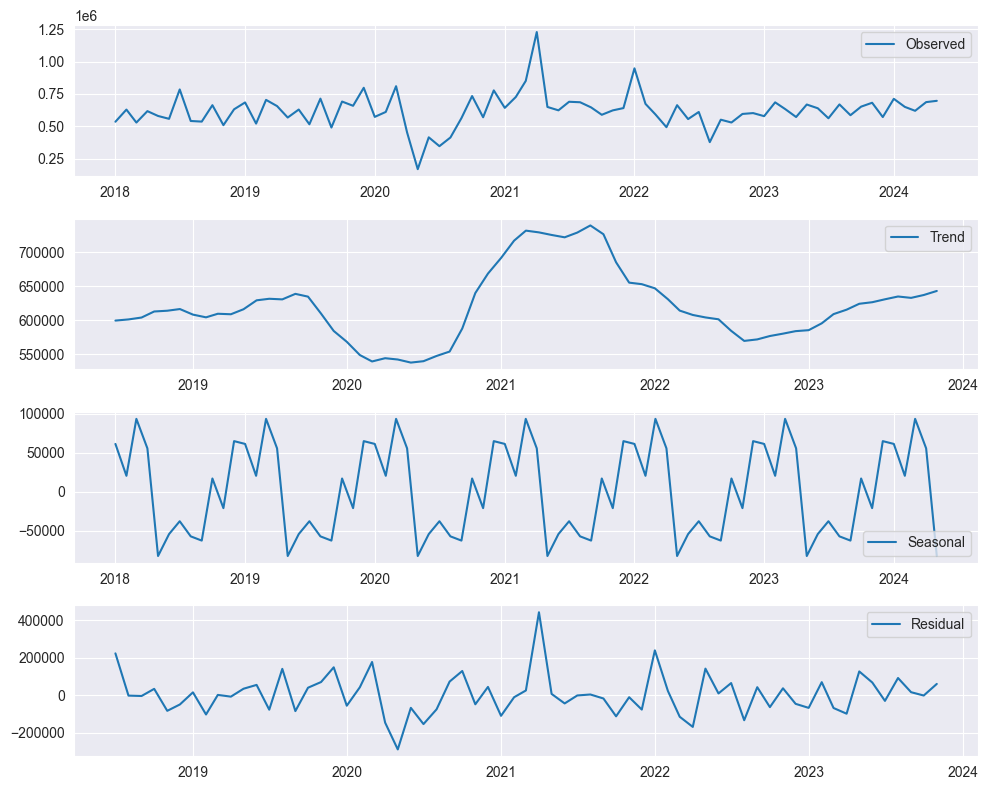

In [57]:
plot_decompose(df_importacion, 'Super')

**AL FIN ALGO DISTINTO**

Se puede observar que tanto en media y varianza, dejando de lado los años de pandemia que provocaron que los datos tuvieran un comportamiento extraño, la serie de tiempo es estacionaria.

##### Gas Propano

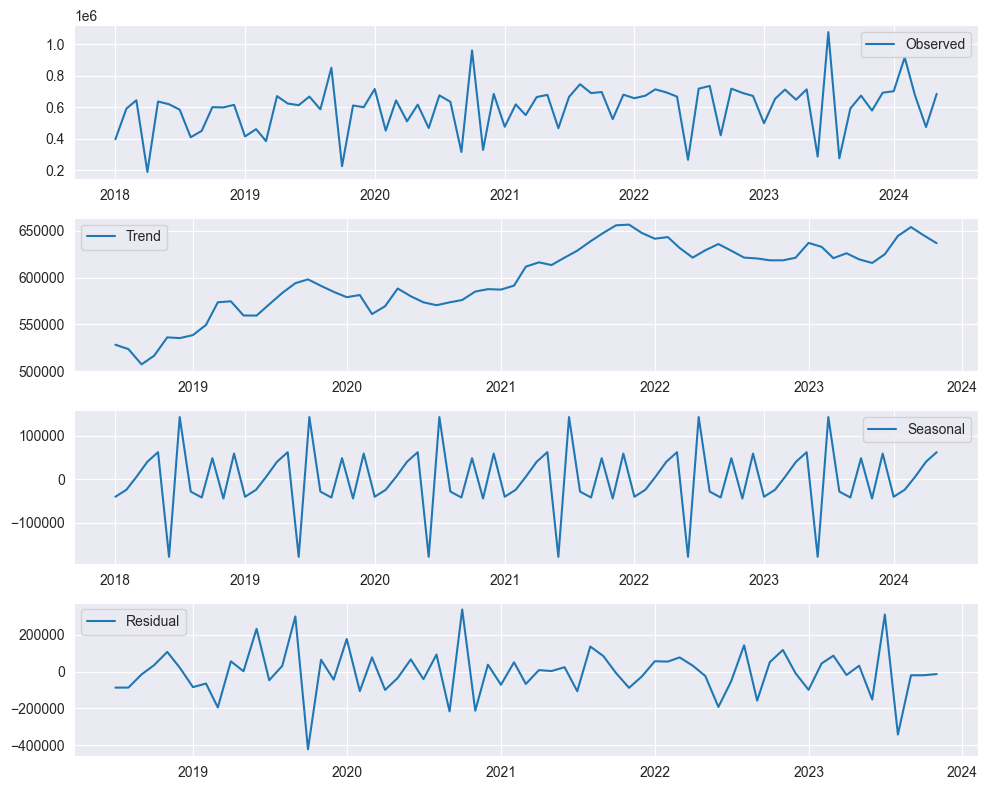

In [58]:
plot_decompose(df_importacion, 'Propano')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

#### Precio

##### Gasolina Diesel

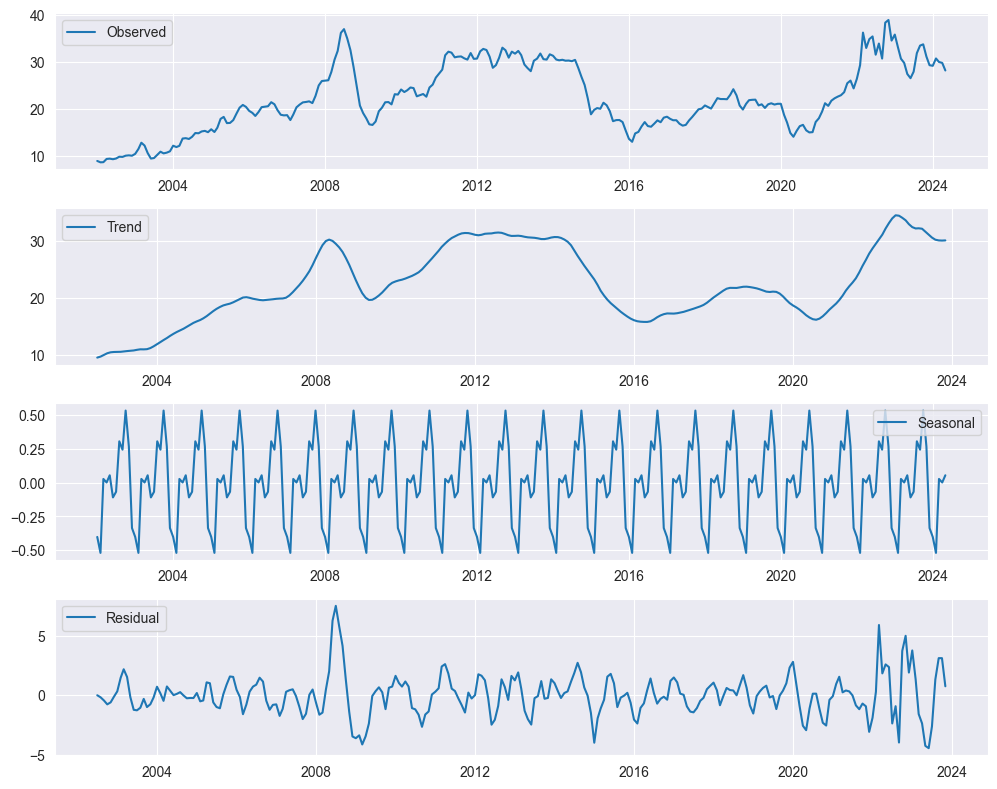

In [59]:
plot_decompose(df_precio, 'Diesel')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Regular

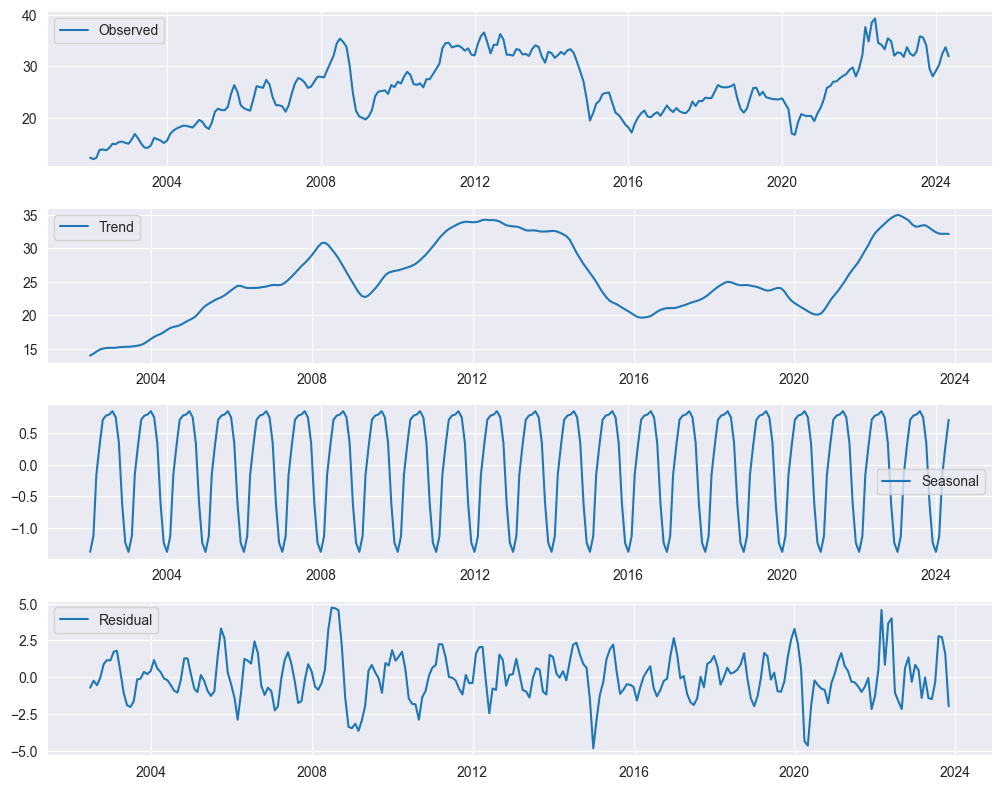

In [60]:
plot_decompose(df_precio, 'Regular')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Super

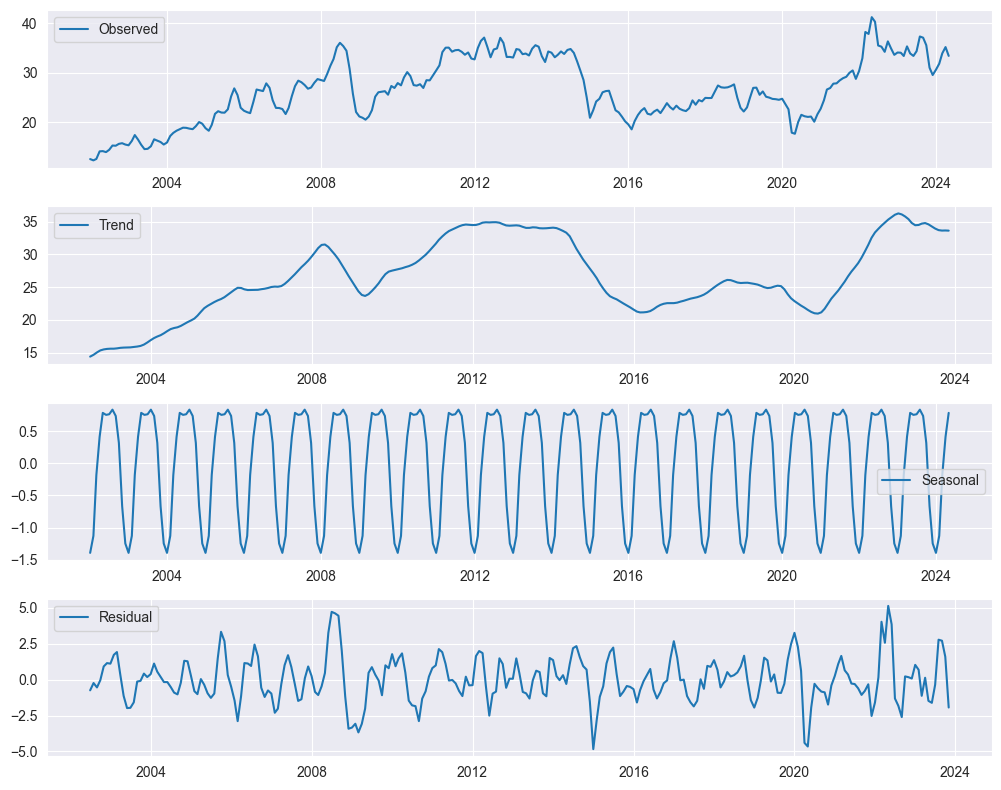

In [61]:
plot_decompose(df_precio, 'Super')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.